# Employee promotion dataset

I chose this Employee Promotion dataset for my machine learning project because I was once an employee myself, and I was always curious about the factors that influence promotions.

Importing all the libraries needed for my dataset "Employee promotion"

In [1]:
# 1. Dataset handling
import pandas as pd
import numpy as np
import plotly.express as px

# 2. Dataset visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import random
import seaborn as sns

# 3. Dataset Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# 4. Using Machine Learning models in my project
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV


# 5. Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# I have 2 datasets for this project one is train-data and other one is test-data. Now, I will determine which dataset will be most helpful for predicting employee promotions.

In [2]:
#Loading test-data 
test_emp=pd.read_csv('test-data.csv')
print('Shape of Test data: ',test_emp.shape)

#Loading train-data
emp=pd.read_csv('train-data.csv')
print('Shape of Train data: ',emp.shape)

Shape of Test data:  (23490, 12)
Shape of Train data:  (54808, 13)


As above shows there is a difference between test and train data in both rows and columns

In [3]:
#Let me find the missing data in test dataset.
test_emp.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [4]:
#checking for extra value which is present in train-data.
emp.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

   #     Understanding the Dataset                                       

Here my targated value is 'is_promoted' 

The columns in the test and train data are the same except  'is_promoted' is not present in the test data. I am looking for this 'is_promoted' column.

Hence concluding to work with train-data only.

In [5]:
# My data is in a .csv file. Now, I'm loading my data into Jupyter Notebook to train it.
# Here I am loading my dataset into the variable 'emp'
emp =pd.read_csv('train-data.csv')
emp

employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2                sourcing                1   34                   3.0   
3                   other                2   39                   1.0   
4                   other                1   45                   3.0   
...                   ...              ...  ...                   ...   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  awards_won?  avg_training_score  is_promoted  
0                      8            0                  49            0  
1                      4            0                  60            0  
2                      7            0                  50            0  
3                     10            0                  50            0  
4                      2            0                  73            0  
...                  ...          ...                 ...          ...  
54803                 17            0                  78            0  
54804                  6            0                  56            0  
54805                  3            0                  79            0  
54806                  2            0                  45            0  
54807                  5            0                  49            0  

[54808 rows x 13 columns]

 #  Exploratory Data Analysis (EDA) 

In [6]:
#displaying the top 10 rows of my dataset
emp.head(10)

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   
5        58896          Analytics   region_2        Bachelor's      m   
6        20379         Operations  region_20        Bachelor's      f   
7        16290         Operations  region_34  Master's & above      m   
8        73202          Analytics  region_20        Bachelor's      m   
9        28911  Sales & Marketing   region_1  Master's & above      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   
5            sourcing                2   31                   3.0   
6               other                1   31                   3.0   
7            sourcing                1   33                   3.0   
8               other                1   28                   4.0   
9            sourcing                1   32                   5.0   

   length_of_service  awards_won?  avg_training_score  is_promoted  
0                  8            0                  49            0  
1                  4            0                  60            0  
2                  7            0                  50            0  
3                 10            0                  50            0  
4                  2            0                  73            0  
5                  7            0                  85            0  
6                  5            0                  59            0  
7                  6            0                  63            0  
8                  5            0                  83            0  
9                  5            0                  54            0

In [7]:
#displaying the bottem 10 rows of dataset
emp.tail(10)

employee_id         department     region         education gender  \
54798        40257  Sales & Marketing   region_2  Master's & above      f   
54799        68093        Procurement   region_2  Master's & above      f   
54800        39227                 HR  region_11        Bachelor's      m   
54801        12431         Technology  region_26        Bachelor's      f   
54802         6915  Sales & Marketing  region_14        Bachelor's      m   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
54798               other                2   40                   5.0   
54799               other                1   50                   5.0   
54800               other                2   34                   5.0   
54801            sourcing                1   31                   NaN   
54802               other                2   31                   1.0   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  awards_won?  avg_training_score  is_promoted  
54798                  4            0                  51            0  
54799                  6            1                  67            0  
54800                  3            0                  52            0  
54801                  1            0                  78            0  
54802                  2            0                  49            0  
54803                 17            0                  78            0  
54804                  6            0                  56            0  
54805                  3            0                  79            0  
54806                  2            0                  45            0  
54807                  5            0                  49            0

In [8]:
#Checking the shape of my dataset. This provides total number of rows and columns
emp.shape

(54808, 13)

In [9]:
#Checking the size of the dataset
emp.size

712504

In [10]:
#Checking if my dataset have any duplicate rows
emp.duplicated().sum()


0

In [11]:
#Getting information about my dataset
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [12]:
#Getting overview statistics for numerical columns
emp.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service   awards_won?  avg_training_score   is_promoted  
count       54808.000000  54808.000000        54808.000000  54808.000000  
mean            5.865512      0.023172           63.386750      0.085170  
std             4.265094      0.150450           13.371559      0.279137  
min             1.000000      0.000000           39.000000      0.000000  
25%             3.000000      0.000000           51.000000      0.000000  
50%             5.000000      0.000000           60.000000      0.000000  
75%             7.000000      0.000000           76.000000      0.000000  
max            37.000000      1.000000           99.000000      1.000000

In [13]:
#Getting overview statististics for categorical columns. 
#This include only the columns with data type 'object', which usually corresponds to string or categorical data
emp.describe(include = 'object')

department    region   education gender recruitment_channel
count               54808     54808       52399  54808               54808
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                16840     12343       36669  38496               30446

In [14]:
#Checking how many employees are promoted and not promoted in my dataset
emp.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

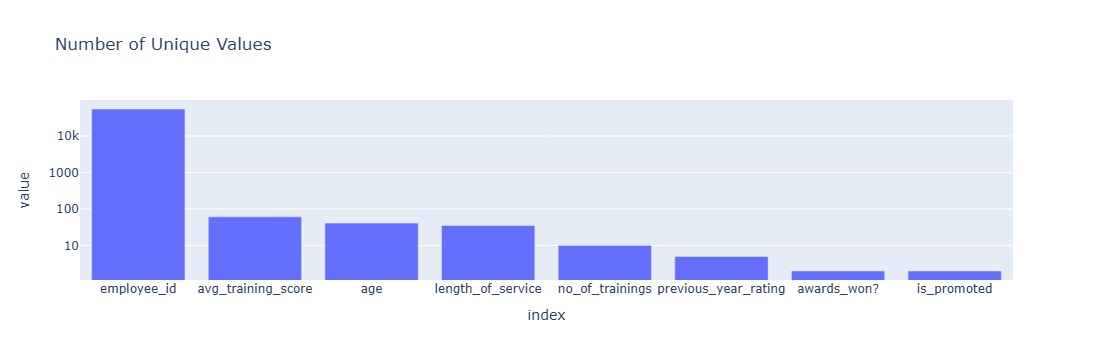

In [15]:
#Checking number of Unique Values in my dataset. This helps to implement modeling decisions.
unique_values= emp.select_dtypes(include='number').nunique()
fig = px.bar(unique_values, title='Number of Unique Values', labels = {'x':'', 'y':'Features'}, log_y=True)
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(showlegend=False)

Data preprocessing / preparation

In [16]:
#Data preprocessing / preparation
#I am cleaning data and preparing and making it ready for modeling
emp.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [17]:
#checking for missing values
emp.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [18]:
#checking is columns have missing values
missing_columns = [col for col in emp.columns if emp[col].isnull().sum() >0]
missing_columns

['education', 'previous_year_rating']

In [19]:
#missing data in percentage
missing_perc = (emp.isnull().mean() *100).round(2)
print(missing_perc.apply(lambda x: f"{x}%"))

employee_id              0.0%
department               0.0%
region                   0.0%
education                4.4%
gender                   0.0%
recruitment_channel      0.0%
no_of_trainings          0.0%
age                      0.0%
previous_year_rating    7.52%
length_of_service        0.0%
awards_won?              0.0%
avg_training_score       0.0%
is_promoted              0.0%
dtype: object


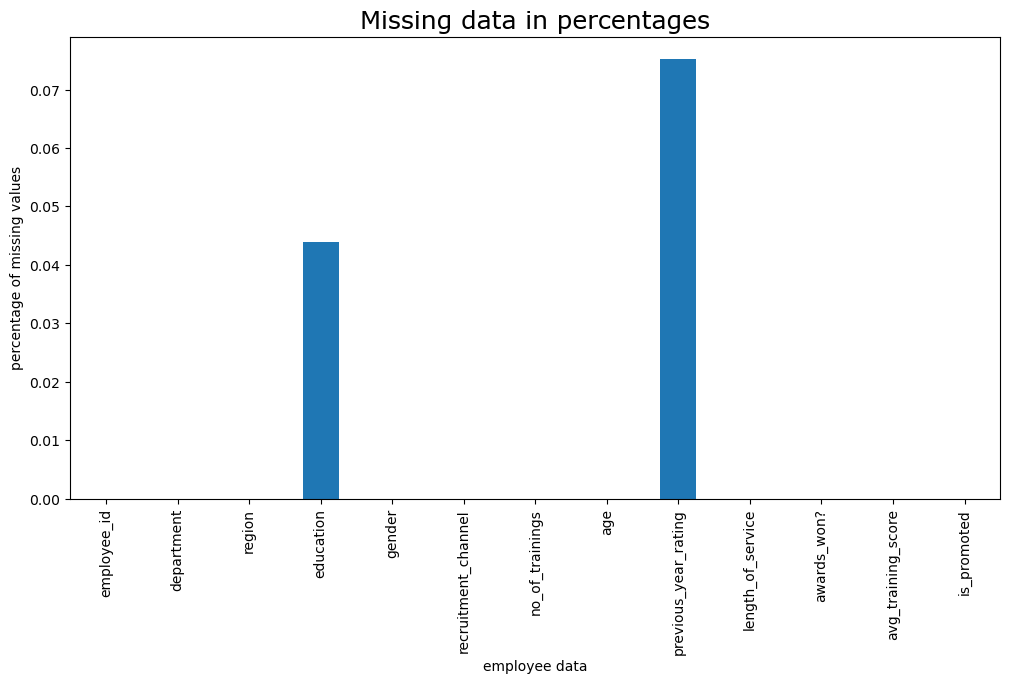

In [20]:
#ploting missing data columns in graph
emp.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('percentage of missing values')
plt.xlabel('employee data')
plt.title('Missing data in percentages', color='black', font='verdana', fontsize=18);

In [21]:
#Dropping records with values= NaN (Not a Number)
emp = emp.dropna()
emp.shape

(48660, 13)

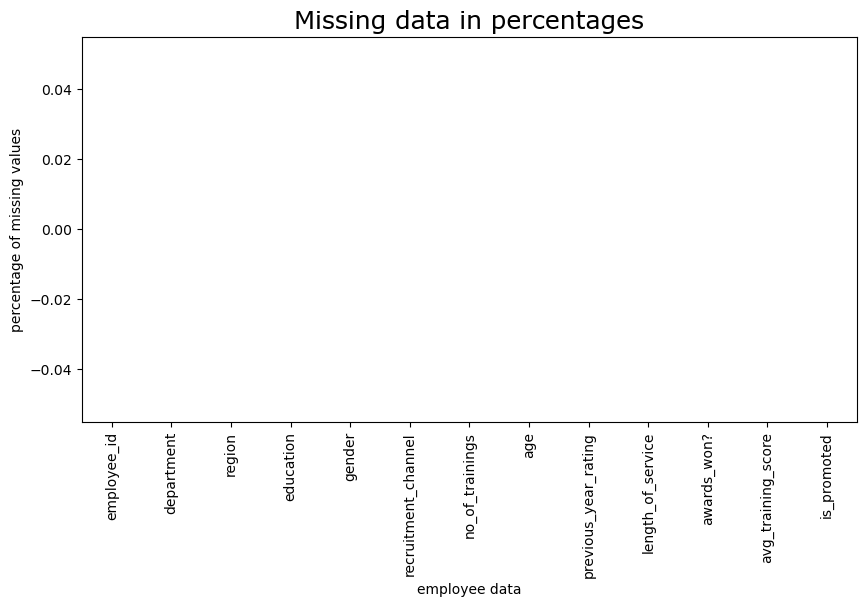

In [22]:
#ploting missing data columns in graph after droping NaN values.
emp.isnull().mean().plot.bar(figsize=(10,5))
plt.ylabel('percentage of missing values')
plt.xlabel('employee data')
plt.title('Missing data in percentages', color='black', font='verdana', fontsize=18);

# UNIVARIATE ANALYSIS

Univariate analysis will helps to summarize and understand individual variables in my dataset. It provides relationships between two or more variables.

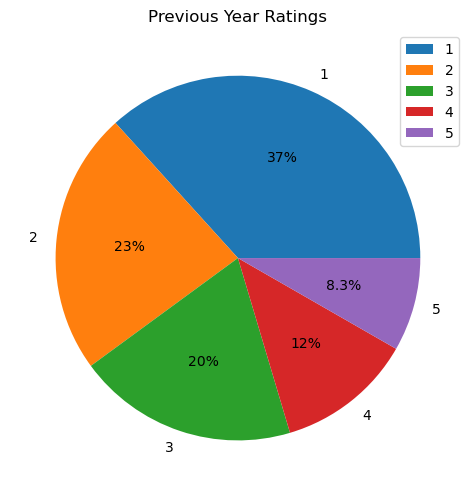

In [23]:
plt.figure(figsize=(20, 10))

#Checking previous year employee rating in all departments
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
plt.pie(emp['previous_year_rating'].value_counts(), labels=labels, autopct='%.2g%%')
plt.title('Previous Year Ratings')
plt.legend();

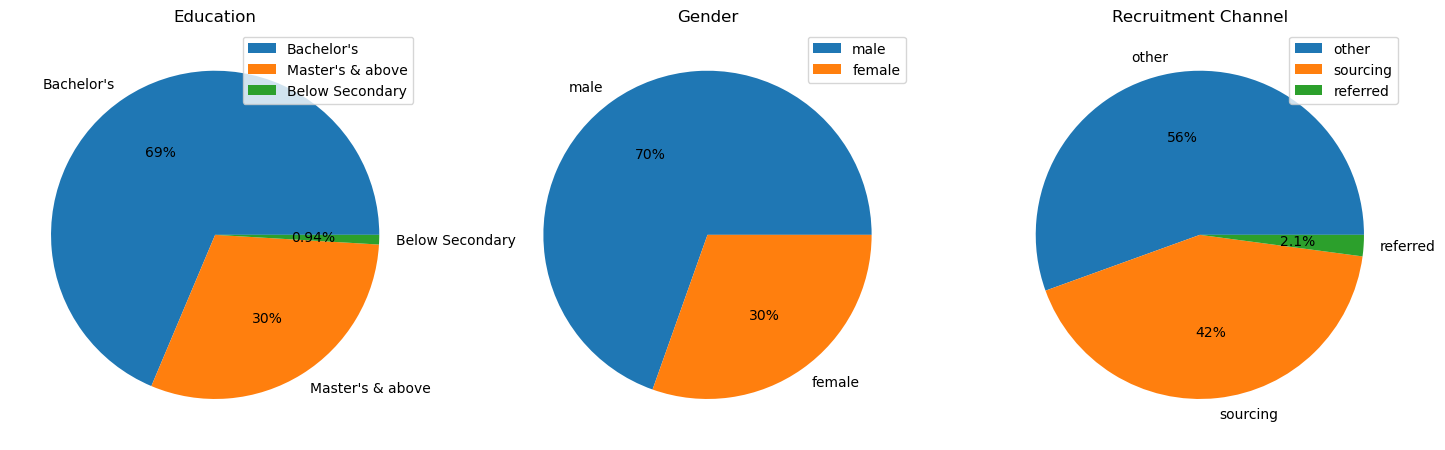

In [24]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
labels = emp['education'].value_counts().index
plt.pie(emp['education'].value_counts(), labels=labels, autopct='%.2g%%')
plt.title("Education")
plt.legend();

plt.subplot(1, 3, 2)
gender_counts = emp['gender'].value_counts()

# Defineing labels to understand better m=male, f=female
labels = ['male' if gender == 'm' else 'female' for gender in gender_counts.index]
plt.pie(emp['gender'].value_counts(), labels=labels, autopct='%.2g%%')
plt.title('Gender')
plt.legend();

plt.subplot(1, 3, 3)
labels = emp['recruitment_channel'].value_counts().index
plt.pie(emp['recruitment_channel'].value_counts(), labels=labels, autopct='%.2g%%')
plt.title('Recruitment Channel')

plt.legend();

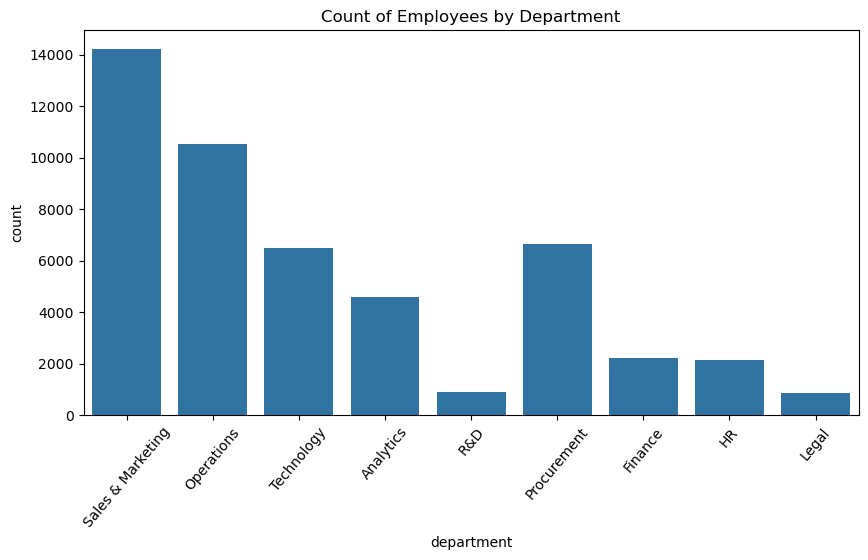

In [25]:
#Count of Employees by Departments
plt.figure(figsize=(10, 5))
sns.countplot(data=emp, x = "department")
plt.xticks(rotation=50)  # Rotate labels by 50 degrees for readability of department names 
plt.title('Count of Employees by Department')
plt.show()

Now analyze the data by education to determine the relationship between education levels and employee promotions

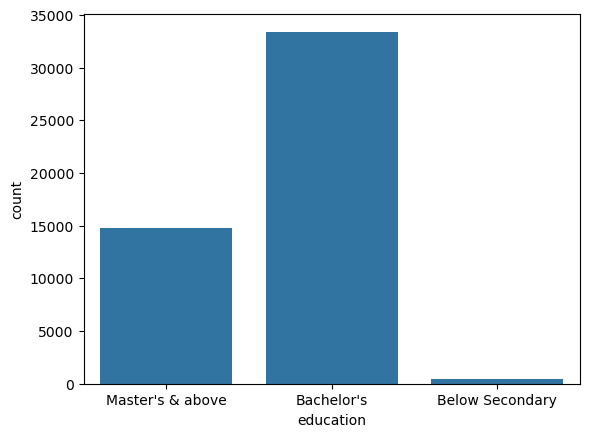

In [26]:
sns.countplot(data=emp, x = "education")
plt.show()

Let me find the training count for an employee, as this may be a factor in their chances of getting a promotion

no_of_trainings
1     39400
2      7107
3      1579
4       402
5       116
6        34
7        10
10        5
8         4
9         3
Name: count, dtype: int64


C:\Users\S3482383\AppData\Local\Temp\ipykernel_7348\2785517243.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




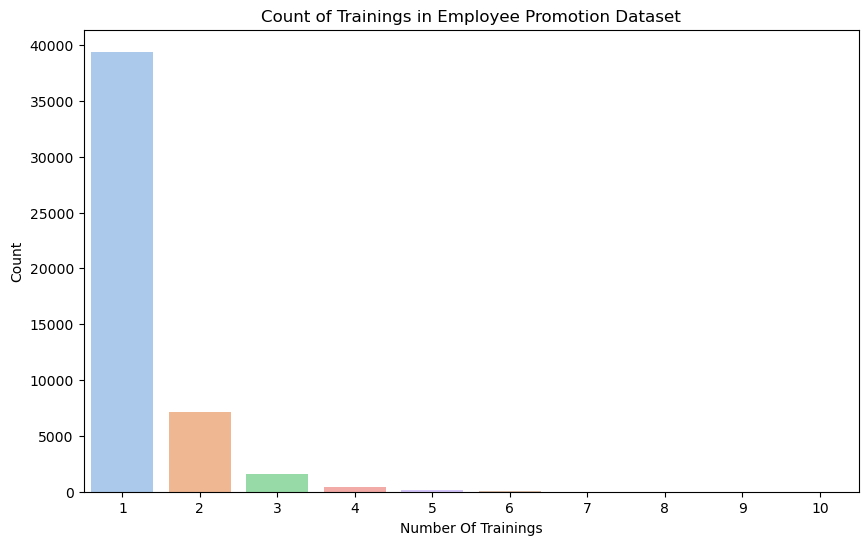

In [27]:
# Count the occurrences of each training category
training_counts = emp['no_of_trainings'].value_counts()

# Print the counts
print(training_counts)

# Create a count plot for the number of trainings
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_trainings', data=emp, palette='pastel')
plt.xlabel('Number Of Trainings')
plt.ylabel('Count')
plt.title('Count of Trainings in Employee Promotion Dataset')
plt.show()

Let me check the ages of the employees, as age may influence their chances of promotion

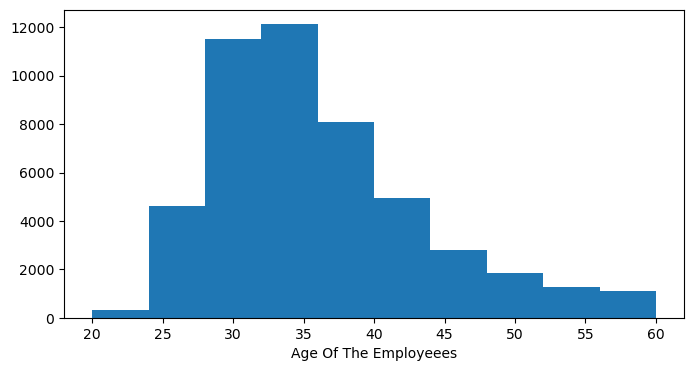

In [28]:
plt.figure(figsize=(8, 4))

plt.hist(emp['age'])
plt.xlabel('Age Of The Employeees');

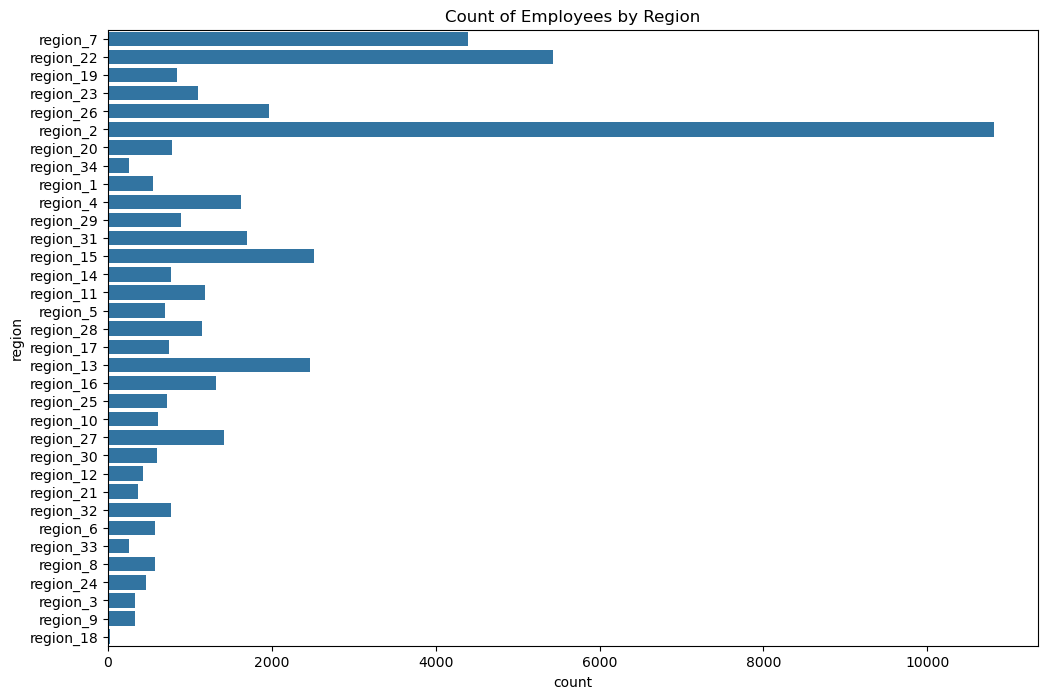

In [29]:
#A count plot showing the number of employees in all regions of the organization
plt.figure(figsize=(12, 8))

sns.countplot(y=emp['region'])
plt.title('Count of Employees by Region');

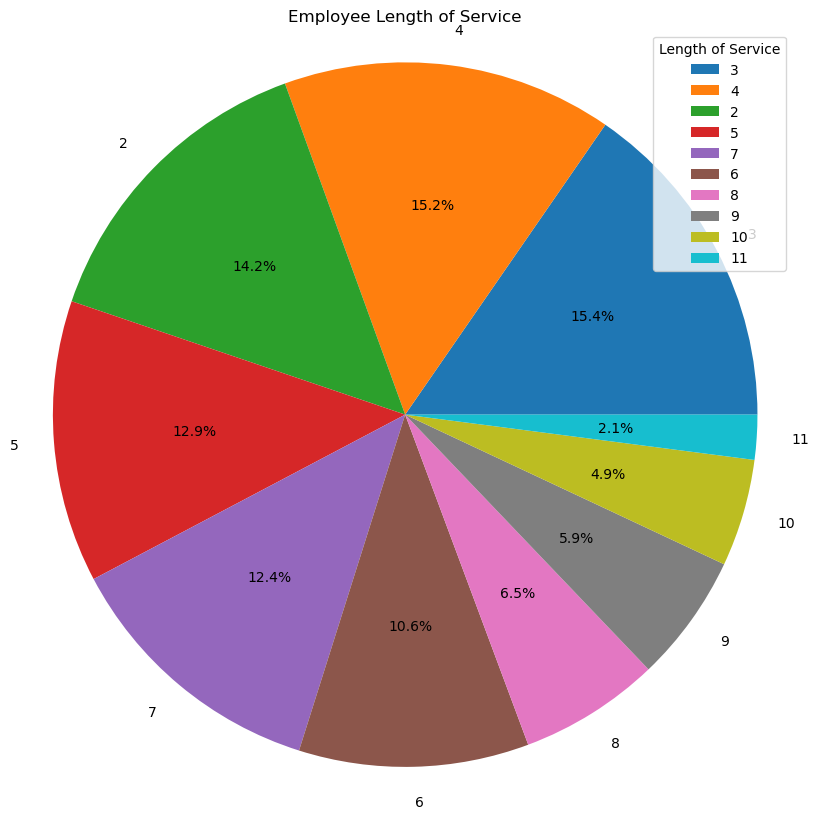

In [30]:
#Checking employee length_of_service or experiance
length_counts = emp["length_of_service"].value_counts().head(10)

# Creating a pie chart using plt
plt.figure(figsize=(10, 10))
plt.pie(length_counts, labels=length_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Employee Length of Service')
plt.legend(title='Length of Service', loc='upper right')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Lets check how many employees are promoted in my dataset

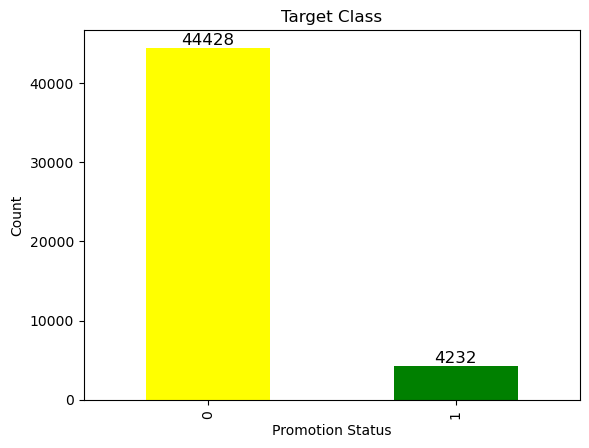

In [31]:
# Number of employees counts of promoted and not promoted
promotion_counts = emp['is_promoted'].value_counts()
ax = promotion_counts.plot.bar(title='Target Class', color=['yellow', 'green'])

# Annotate the bars with the exact counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)

# Set labels
plt.xlabel('Promotion Status')
plt.ylabel('Count')

# Show the plot
plt.show()

                    As per above plot only 8.7% employees are promoted.

# We can clearly see that, the data is not balanced. The promoted employees are only 4232 and not promoted employees are 44428. 

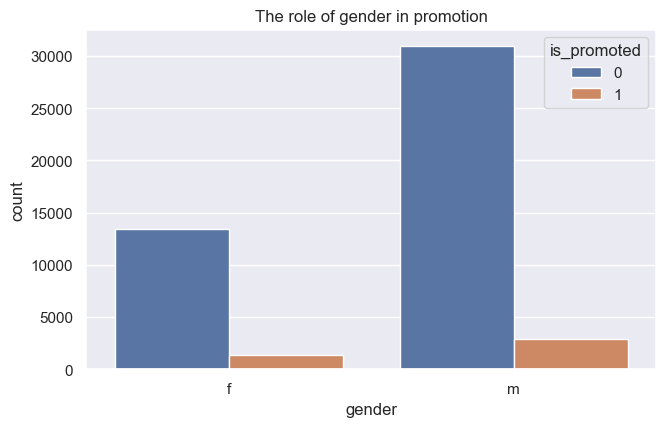

In [32]:
#Comparing promotions based on gender
plt.figure(figsize = (25,15))
sns.set(font_scale = 1)
plt.subplot(332)
sns.countplot(emp,x=emp['gender'], hue=emp['is_promoted'])
plt.title('The role of gender in promotion');

Now analyse the data by department to determine which department have more promotions

<Figure size 900x500 with 0 Axes>

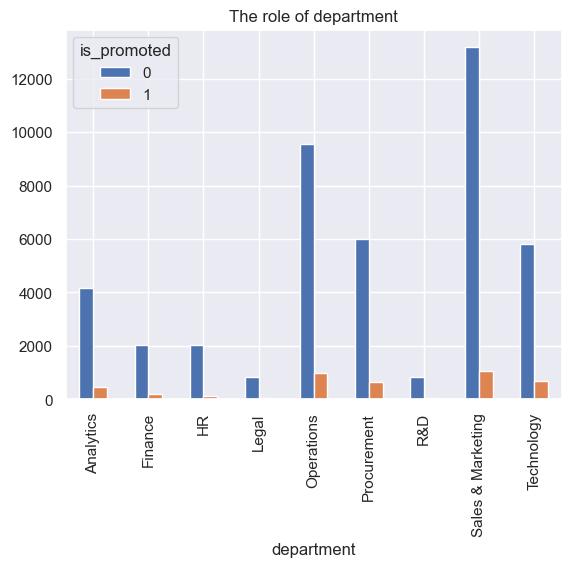

In [33]:
plt.figure(figsize=(9, 5))
x = pd.crosstab(emp['department'], emp['is_promoted'])
x.plot.bar()
plt.title('The role of department');

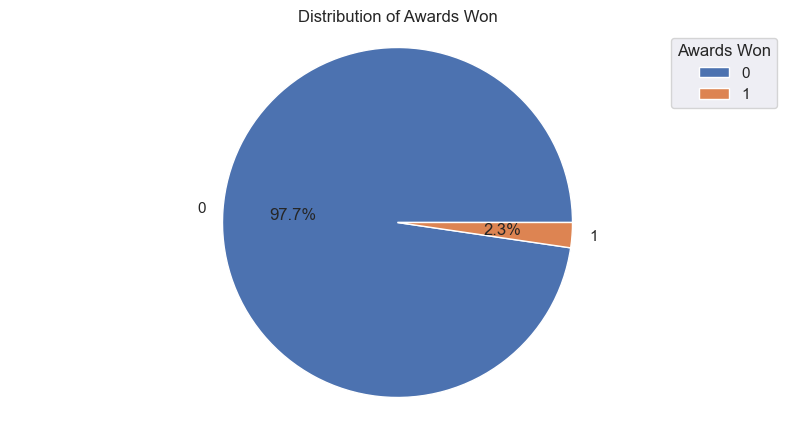

In [34]:
#Checking how many employees won awards in all departments
awards_counts = emp["awards_won?"].value_counts().head(7)
plt.figure(figsize=(10, 5))
plt.pie(awards_counts, labels=awards_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Awards Won')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Awards Won', loc='upper right')
plt.show()  # Display the plot

          97.7% employees did not won the awards and 2.3% employees won the awards. Looking at awards, its very less ratio.

 CORRELATION  MAP 

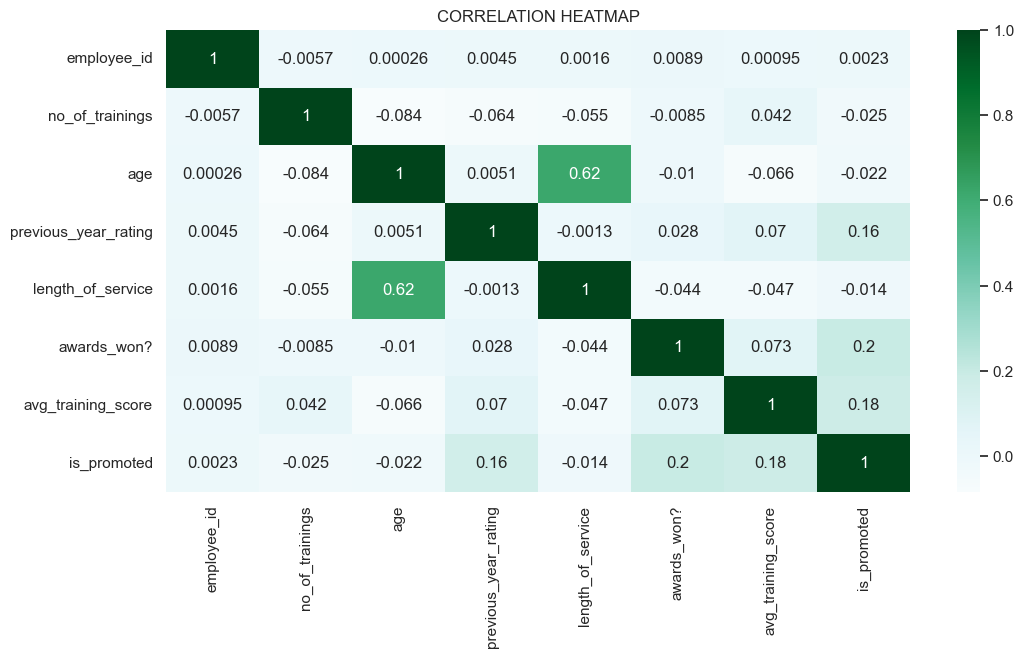

In [35]:
corr = emp.corr(numeric_only=True)  # Specify numeric_only=True

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='BuGn') 
plt.title('CORRELATION HEATMAP')
plt.show()

# Ratio of promoted employees based on the number of training sessions attended.

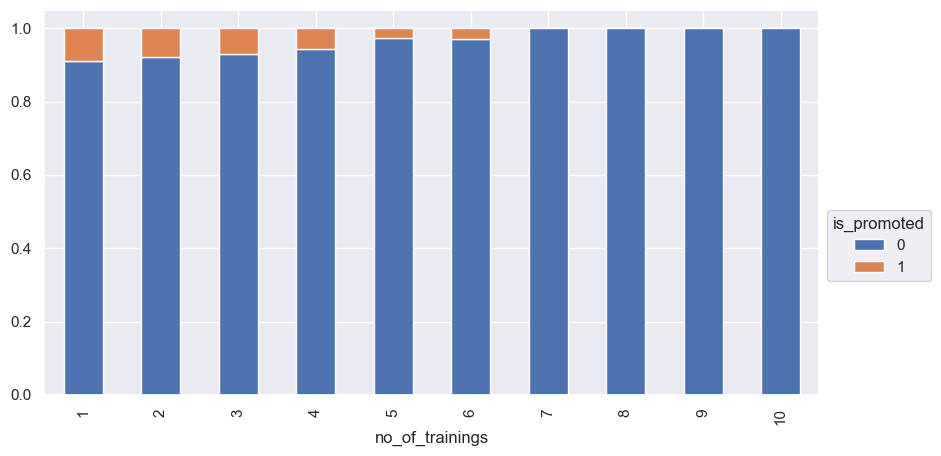

In [36]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(emp.no_of_trainings,emp.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

As per above result no of trainings 1 to 6, employees are promoted. From no of trainings 7 to 10, employees are not promoted

Gender wise Distribution of employees getting promoted or not

Text(0.5, 1.0, 'Gender wise Distribution of employees getting promoted or not')

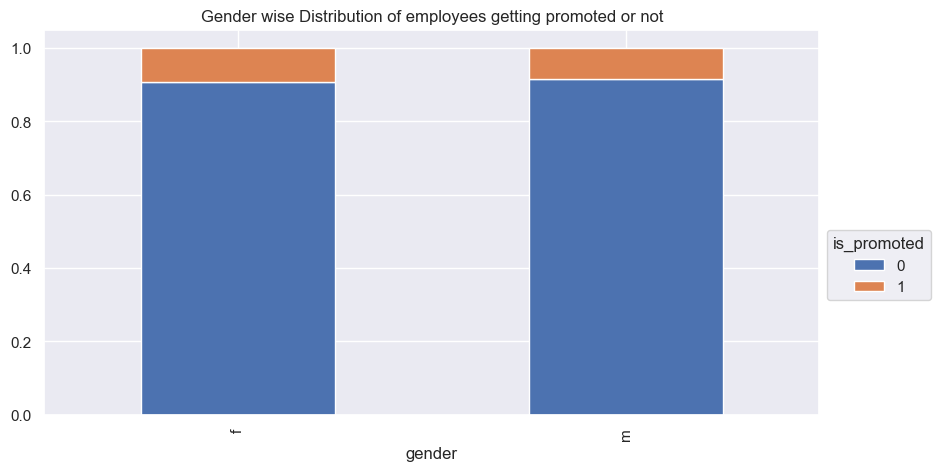

In [37]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(emp.gender,emp.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))
plt.title("Gender wise Distribution of employees getting promoted or not")

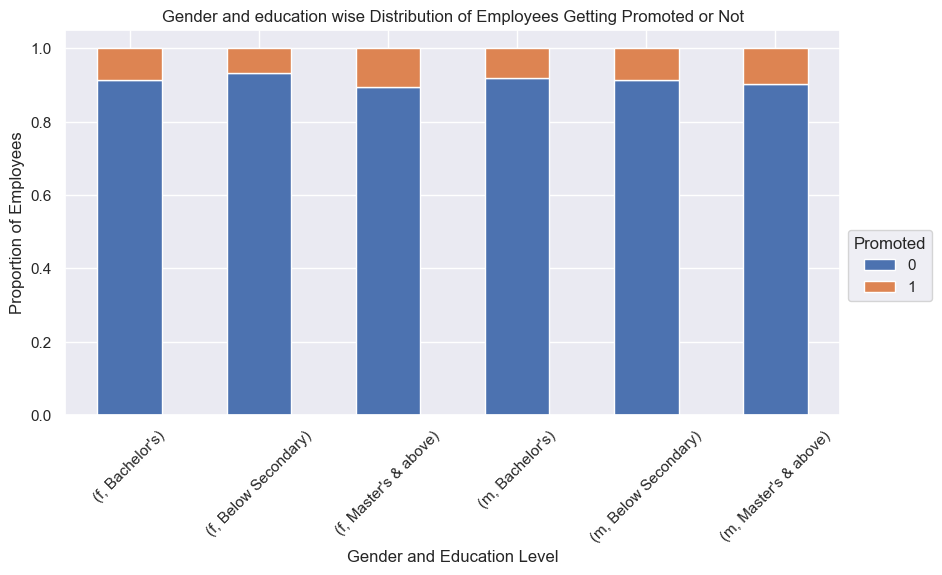

In [38]:
#Lets fine gender and educatiuon wise promotions possibilities
score_bin = pd.crosstab(index=[emp.gender, emp.education], columns=emp.is_promoted, normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='Promoted', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title("Gender and education wise Distribution of Employees Getting Promoted or Not")
plt.xlabel('Gender and Education Level')
plt.ylabel('Proportion of Employees')
plt.xticks(rotation=45)  
plt.show()

Female employees with 'Masters & above' education level have the highest rate of getting promoted in the entire company.

Distribution of promoted employees ratio across different avg_training_score

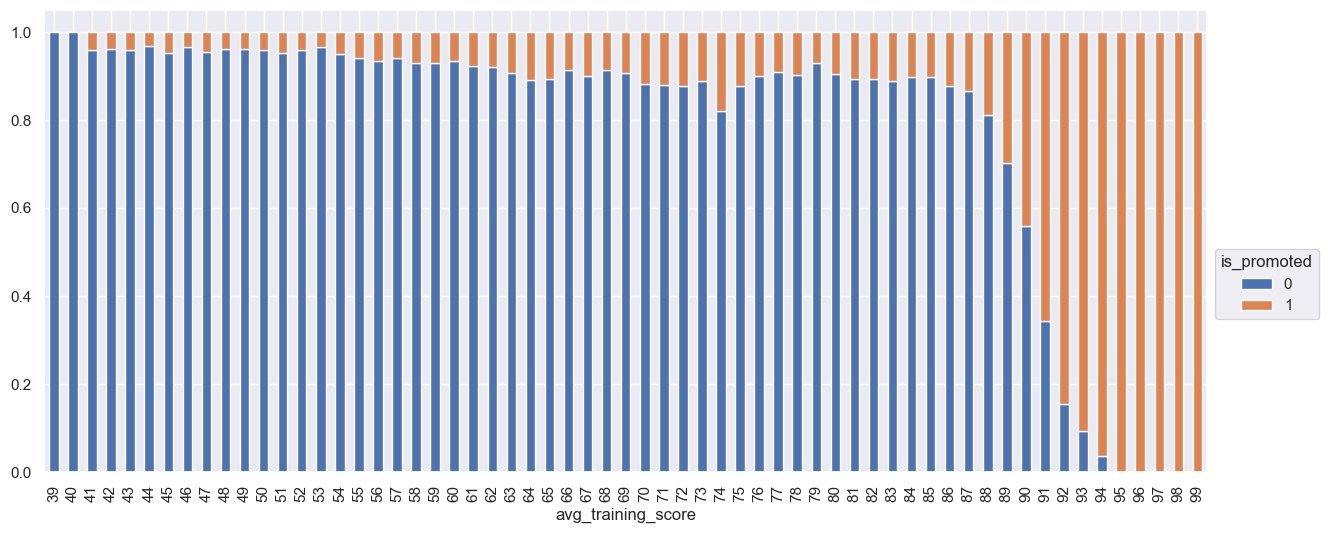

In [39]:
plt.rcParams['figure.figsize'] = [15, 6]
score_bin = pd.crosstab(emp.avg_training_score,emp.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

# Employee who has more training score may have high chances of getting promotion





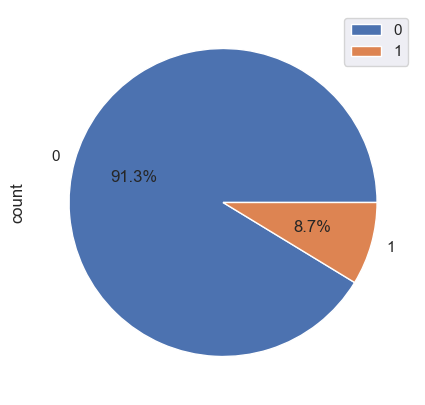

In [40]:
emp["is_promoted"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 5), startangle=0).legend()


# The data is not balanced. 91.3% and 8.7% ratio is very unbalanced data.

As my data set 'Employee promotion' data set having imbalanced data. I will use resampling techniques

# ----------------------------  Handling Imbalance data  ---------------------------------

Models trained on imbalanced datasets tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in high accuracy but low recall for the minority class. The model may overfit to the majority class, learning patterns that do not generalize well to unseen data, particularly for the minority class. The model may not perform well in real-world scenarios where the minority class is of significant interest

Using Label Encoder To transform the data

In [41]:
# The 'object' data type columns are transformed as follows
l=LabelEncoder()
for i in emp.columns:
    if emp[i].dtype == 'object':
         emp.loc[:, i] = l.fit_transform(emp[i])

In [42]:
emp.head()

employee_id department region education gender recruitment_channel  \
0        65438          7     31         2      0                   2   
1        65141          4     14         0      1                   0   
2         7513          7     10         0      1                   2   
3         2542          7     15         0      1                   0   
4        48945          8     18         0      1                   0   

   no_of_trainings  age  previous_year_rating  length_of_service  awards_won?  \
0                1   35                   5.0                  8            0   
1                1   30                   5.0                  4            0   
2                1   34                   3.0                  7            0   
3                2   39                   1.0                 10            0   
4                1   45                   3.0                  2            0   

   avg_training_score  is_promoted  
0                  49            0  
1                  60            0  
2                  50            0  
3                  50            0  
4                  73            0

# Random Oversampling, SMOTE, Random Undersampling

Using resampling techniques to generate synthetic samples for the minority class employees who were promoted.

In [43]:
# Separate features (X) and target (y)
X = emp.drop('is_promoted', axis=1)
y = emp['is_promoted']

# 1. Random Oversampling 
X_oversampled, y_oversampled = resample(X[y == 1],
                                        y[y == 1],
                                        replace=True,
                                        n_samples=X[y == 0].shape[0],
                                        random_state=33)

X_balanced_oversampled = pd.concat([X[y == 0], X_oversampled])
y_balanced_oversampled = pd.concat([y[y == 0], y_oversampled])

# 2. SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=33)
X_smote, y_smote = smote.fit_resample(X, y)


# 3. Random Undersampling
rus = RandomUnderSampler(random_state=33)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Model Training

Dividing my dataset into training and testing sets.

In [44]:
# Split data
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=33, stratify=y)


<Figure size 1000x600 with 0 Axes>

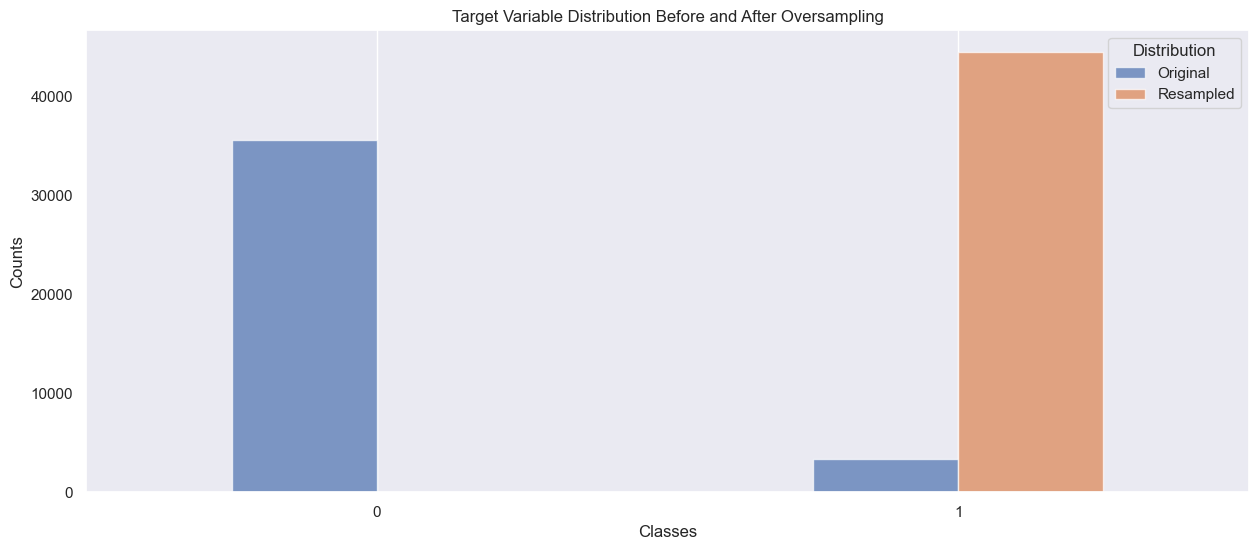

In [45]:
original_counts = ytrain.value_counts()
resampled_counts = y_oversampled.value_counts()

# Create a DataFrame for plotting
data = {
    'Original': original_counts,
    'Resampled': resampled_counts
}
df = pd.DataFrame(data).fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
df.plot(kind='bar', alpha=0.7)
plt.title('Target Variable Distribution Before and After Oversampling')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.legend(title='Distribution', loc='upper right')
plt.grid(axis='y')
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
xtrain=mms.fit_transform(xtrain)
xtest=mms.fit_transform(xtest)
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)

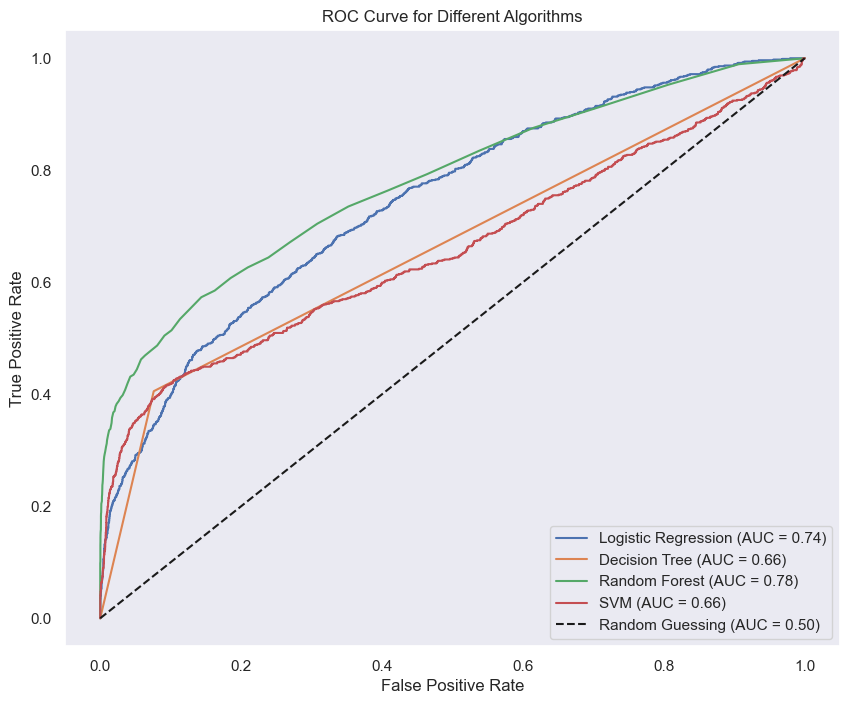

In [47]:
from sklearn.metrics import roc_curve, auc
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)  # Set probability=True to get probabilities for ROC
}

# Store the ROC curve data
roc_data = {}

# Train each model and compute ROC curve data
for name, model in models.items():
    model.fit(xtrain, ytrain)
    y_scores = model.predict_proba(xtest)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(ytest, y_scores)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')

# Customize the plot
plt.title('ROC Curve for Different Algorithms')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [48]:
Results = []  # Initialize as a list to store dictionaries
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = SVC()
models = [lr, dtc, rfc,svm]


for model_instance in models:  # Change the loop variable name
    model_instance.fit(xtrain, ytrain)
    ypred = model_instance.predict(xtest)

    print('Models :', model_instance.__class__.__name__)
    print('--------------------------------------------------------------------------------------------------------------')
    print('confusion matrix :', confusion_matrix(ytest, ypred))
    print('classification report:', classification_report(ytest, ypred))
    print('accuracy :', round(accuracy_score(ytest, ypred), 2))
    print('precision :', round(precision_score(ytest, ypred), 2))
    print('recall :', round(recall_score(ytest, ypred), 2))
    print('f1 :', round(f1_score(ytest, ypred), 2))
    print()
    R = {'Models': model_instance.__class__.__name__,
         'Accuracy': round(accuracy_score(ytest, ypred), 2),
         'Recall': round(recall_score(ytest, ypred), 2),
         'Precision': round(precision_score(ytest, ypred), 2),
         'F1': round(f1_score(ytest, ypred), 2)
         }
    Results.append(R)  # Append the dictionary to the list

Results = pd.DataFrame(Results)  # Convert the list of dictionaries to a DataFrame

print(Results)

Models : LogisticRegression
--------------------------------------------------------------------------------------------------------------
confusion matrix : [[8858   28]
 [ 785   61]]
classification report:               precision    recall  f1-score   support

           0       0.92      1.00      0.96      8886
           1       0.69      0.07      0.13       846

    accuracy                           0.92      9732
   macro avg       0.80      0.53      0.54      9732
weighted avg       0.90      0.92      0.88      9732

accuracy : 0.92
precision : 0.69
recall : 0.07
f1 : 0.13

Models : DecisionTreeClassifier
--------------------------------------------------------------------------------------------------------------
confusion matrix : [[8200  686]
 [ 506  340]]
classification report:               precision    recall  f1-score   support

           0       0.94      0.92      0.93      8886
           1       0.33      0.40      0.36       846

    accuracy                   

Accuracy

In [49]:
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
Accuracy = [0.92, 0.88, 0.93, 0.92] 
summary = pd.DataFrame({'Accuracy':Accuracy}, index=classifiers)       
summary

Accuracy
Logistic Regression      0.92
Decision Tree            0.88
Random Forest            0.93
SVM                      0.92

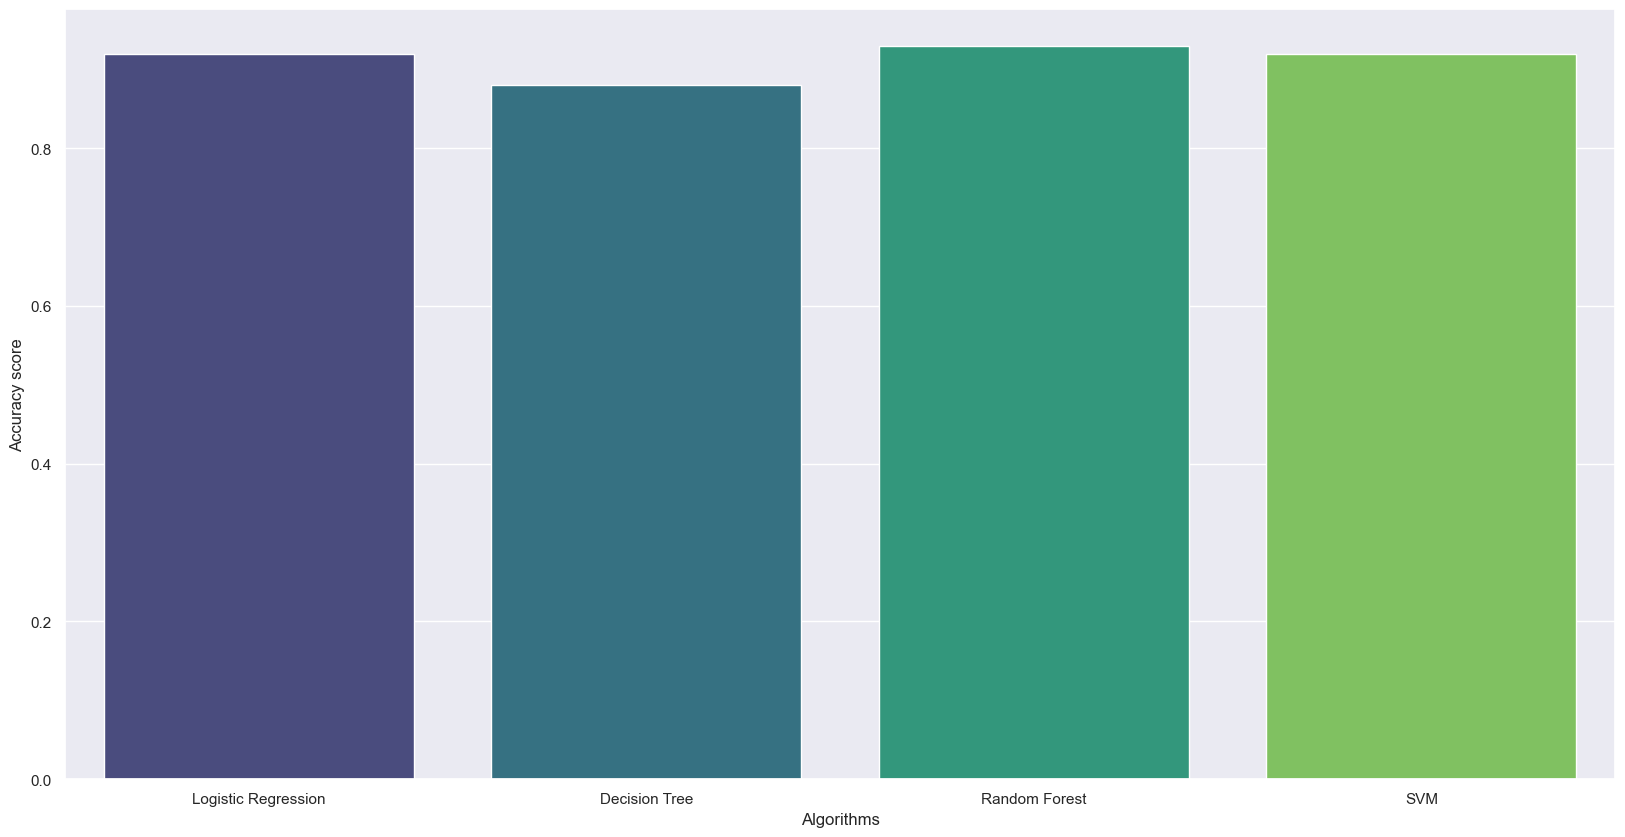

In [50]:
scores = [0.92, 0.88, 0.93, 0.92]  # Defined scores 
algorithms = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"] # Define algorithms with the desired labels
 
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms, y=scores, hue=algorithms, legend=False, palette="viridis") # Corrected: Use x and y parameters
plt.show()

# ---------------------------  Hyperparameter Tuning  -------------------------------

# Hyperparameter Tuning using Grid Search

Evaluation

In [51]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [52]:
import time  # Import the time module
start = time.time()
RN=RandomForestClassifier()
Grid_RN = GridSearchCV(estimator=RN, param_grid=param_grid, cv= 2)
Grid_RN.fit(xtrain, ytrain)
end = time.time()
RF_time1=end-start

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-package

In [53]:
Results = []

# Define models and their hyperparameters for Grid Search
models = {
    'Logistic Regression': (LogisticRegression(), {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga'],
       }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2']
    }),
    'SVC': (SVC(), {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
}

# Perform Grid Search for each model
for model_name, (model_instance, params) in models.items():
    grid_search = GridSearchCV(model_instance, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(xtrain, ytrain)
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(xtest)
    
    # Print results
    print('Models:', model_name)
    print('Best Parameters:', grid_search.best_params_)
    print('Confusion Matrix:', confusion_matrix(ytest, y_pred))
    print('Classification Report:', classification_report(ytest, y_pred))
    print('Accuracy:', round(accuracy_score(ytest, y_pred), 2))
    print('Precision:', round(precision_score(ytest, y_pred), 2))
    print('Recall:', round(recall_score(ytest, y_pred), 2))
    print('F1:', round(f1_score(ytest, y_pred), 2))
    print()
    
    # Store results
    R = {
        'Models': model_name,
        'Best Parameters': grid_search.best_params_,
        'Accuracy': round(accuracy_score(ytest, y_pred), 2),
        'Recall': round(recall_score(ytest, y_pred), 2),
        'Precision': round(precision_score(ytest, y_pred), 2),
        'F1': round(f1_score(ytest, y_pred), 2)
    }
    Results.append(R)

# Convert the list of dictionaries to a DataFrame
Results_df = pd.DataFrame(Results)

# Display the results
print(Results_df)

Models: Logistic Regression
Best Parameters: {'C': 0.1, 'solver': 'saga'}
Confusion Matrix: [[8863   23]
 [ 788   58]]
Classification Report:               precision    recall  f1-score   support

           0       0.92      1.00      0.96      8886
           1       0.72      0.07      0.13       846

    accuracy                           0.92      9732
   macro avg       0.82      0.53      0.54      9732
weighted avg       0.90      0.92      0.88      9732

Accuracy: 0.92
Precision: 0.72
Recall: 0.07
F1: 0.13

Models: Decision Tree
Best Parameters: {'max_depth': 10, 'min_samples_split': 5}
Confusion Matrix: [[8827   59]
 [ 612  234]]
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.99      0.96      8886
           1       0.80      0.28      0.41       846

    accuracy                           0.93      9732
   macro avg       0.87      0.63      0.69      9732
weighted avg       0.92      0.93      0.92      9732

A

# Hyperparameter Tuning using Random Search

In [54]:
models = {
    'Logistic Regression': (LogisticRegression(), {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga'],
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2']
    }),
    'SVC': (SVC(), {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
}

Results = []

# Perform Random Search for each model
for model_name, (model_instance, params) in models.items():
    random_search = RandomizedSearchCV(model_instance, param_distributions=params, 
                                       n_iter=10, cv=5, scoring='accuracy', 
                                       n_jobs=-1, random_state=42)
    random_search.fit(xtrain, ytrain)
    
    # Get the best model from random search
    best_model = random_search.best_estimator_
    
    # To make predictions using predict on xtest data
    y_pred = best_model.predict(xtest)
    
    # Print results
    print('Models:', model_name)
    print('Best Parameters:', random_search.best_params_)
    print('Confusion Matrix:\n', confusion_matrix(ytest, y_pred))
    print('Classification Report:\n', classification_report(ytest, y_pred))
    print('Accuracy:', round(accuracy_score(ytest, y_pred), 2))
    print('Precision:', round(precision_score(ytest, y_pred), 2))
    print('Recall:', round(recall_score(ytest, y_pred), 2))
    print('F1:', round(f1_score(ytest, y_pred), 2))
    print()
    
    # Store results
    R = {
        'Models': model_name,
        'Best Parameters': random_search.best_params_,
        'Accuracy': round(accuracy_score(ytest, y_pred), 2),
        'Recall': round(recall_score(ytest, y_pred), 2),
        'Precision': round(precision_score(ytest, y_pred), 2),
        'F1': round(f1_score(ytest, y_pred), 2)
    }
    Results.append(R)

# Convert the list of dictionaries to a DataFrame
Results_df = pd.DataFrame(Results)

# Display the results
print(Results_df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.



Models: Logistic Regression
Best Parameters: {'solver': 'saga', 'C': 0.1}
Confusion Matrix:
 [[8863   23]
 [ 788   58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      8886
           1       0.72      0.07      0.13       846

    accuracy                           0.92      9732
   macro avg       0.82      0.53      0.54      9732
weighted avg       0.90      0.92      0.88      9732

Accuracy: 0.92
Precision: 0.72
Recall: 0.07
F1: 0.13

Models: Decision Tree
Best Parameters: {'min_samples_split': 5, 'max_depth': 10}
Confusion Matrix:
 [[8828   58]
 [ 613  233]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      8886
           1       0.80      0.28      0.41       846

    accuracy                           0.93      9732
   macro avg       0.87      0.63      0.69      9732
weighted avg       0.92      0.93      0.92      973

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.



Models: Random Forest
Best Parameters: {'n_estimators': 200, 'max_features': 'log2'}
Confusion Matrix:
 [[8852   34]
 [ 623  223]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      8886
           1       0.87      0.26      0.40       846

    accuracy                           0.93      9732
   macro avg       0.90      0.63      0.68      9732
weighted avg       0.93      0.93      0.92      9732

Accuracy: 0.93
Precision: 0.87
Recall: 0.26
F1: 0.4



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.



Models: SVC
Best Parameters: {'kernel': 'rbf', 'C': 10}
Confusion Matrix:
 [[8865   21]
 [ 764   82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      8886
           1       0.80      0.10      0.17       846

    accuracy                           0.92      9732
   macro avg       0.86      0.55      0.57      9732
weighted avg       0.91      0.92      0.89      9732

Accuracy: 0.92
Precision: 0.8
Recall: 0.1
F1: 0.17

                Models                                Best Parameters  \
0  Logistic Regression                   {'solver': 'saga', 'C': 0.1}   
1        Decision Tree      {'min_samples_split': 5, 'max_depth': 10}   
2        Random Forest  {'n_estimators': 200, 'max_features': 'log2'}   
3                  SVC                     {'kernel': 'rbf', 'C': 10}   

   Accuracy  Recall  Precision    F1  
0      0.92    0.07       0.72  0.13  
1      0.93    0.28       0.80  0.41  
2      0.93 

# Conclusion

Concluding after applying the selected machine learning models on my employee promotion dataset.
Decision Tree = 93%
Random Forest = 93%
Logistic Regression = 92%
svc = 92%